In [3]:
import tensorflow as tf
import random
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
import os
import glob
from IPython.display import clear_output

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def createModel():
    model = tf.keras.Sequential()

    #32x32x1
    model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 8, activation = 'relu', input_shape=(32,32,1)))

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1)))

    #16x16x8
    model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 16, activation = 'relu'))

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1)))

    #8x8x16
    model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation = 'relu'))

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1)))
    
    #4x4x32
    model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation = 'relu'))

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1)))
    
    #2x2x32
    model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation = 'relu'))

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1)))
    
    #1x1x32
    #flatten
    model.add(tf.keras.layers.Flatten())
    
    #classify
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(62, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

    return model

In [9]:
model = createModel()

In [10]:
font_files = []
font_files.extend(glob.glob('fonts/*/*'))

gblur = ImageFilter.GaussianBlur(radius=1)

char_values = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'

#train 50 batches
for bat in range(50):
    train_samples = []
    train_labels = []

    #generate 2000 random images
    for _ in range(2000):
        #select random character
        charIndex = random.randint(0,len(char_values)-1)
        #random font and size
        font = ImageFont.truetype(font_files[random.randint(0,len(font_files)-1)], random.randint(20,34))
        #new b/w image 32x32 pixels
        img = Image.new('1', (32, 32))
        draw = ImageDraw.Draw(img)
        #draw at random position
        draw.text((random.randint(0,10), random.randint(-5,2)), char_values[charIndex], font=font, fill=(255))
        #random rotation
        img = img.rotate(random.randint(-10,10))
        #randomly apply to smoothing
        if random.random() < 0.25:
            img = img.filter(ImageFilter.SMOOTH)
            
        #convert image to numpy array
        np_img = np.expand_dims(np.array(img),axis=2)
        train_samples.append(np_img)
        train_labels.append(np.eye(62)[charIndex])

    train_samples = np.stack(train_samples)
    train_labels = np.stack(train_labels)

    model.fit(train_samples, train_labels, epochs=1, batch_size=32, shuffle=True)
    #clear output every 10 batches
    if bat % 10 == 0:
        clear_output()
        print(bat)
        

40
Epoch 1/1
2000/2000 [==============================] - 1s 397us/step - loss: 1.2571 - acc: 0.6170
Epoch 1/1
2000/2000 [==============================] - 1s 395us/step - loss: 1.2449 - acc: 0.6035
Epoch 1/1
2000/2000 [==============================] - 1s 397us/step - loss: 1.2086 - acc: 0.6125
Epoch 1/1
2000/2000 [==============================] - 1s 393us/step - loss: 1.1574 - acc: 0.6225
Epoch 1/1
2000/2000 [==============================] - 1s 400us/step - loss: 1.2241 - acc: 0.6175
Epoch 1/1
2000/2000 [==============================] - 1s 393us/step - loss: 1.1320 - acc: 0.6395
Epoch 1/1
2000/2000 [==============================] - 1s 417us/step - loss: 1.2025 - acc: 0.6200
Epoch 1/1
2000/2000 [==============================] - 1s 417us/step - loss: 1.1432 - acc: 0.6410
Epoch 1/1
2000/2000 [==============================] - 1s 412us/step - loss: 1.1883 - acc: 0.6135


In [ ]:
model.save('imagerecog.model')

In [60]:
char_values = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
font_files = []
font_files.extend(glob.glob('fonts/*/*'))

charIndex = random.randint(0,len(char_values)-1)
#random font and size
font = ImageFont.truetype(font_files[random.randint(0,len(font_files)-1)], random.randint(20,34))
#new b/w image 32x32 pixels
img = Image.new('1', (32, 32))
draw = ImageDraw.Draw(img)
#draw at random position
draw.text((random.randint(0,10), random.randint(-5,2)), char_values[charIndex], font=font, fill=(255))
#random rotation
img = img.rotate(random.randint(-10,10))
#randomly apply to smoothing
if random.random() < 0.25:
    img = img.filter(ImageFilter.SMOOTH)

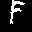

In [61]:
img